In [18]:
import numpy as np
import pandas as pd
import mne

In [19]:
# load in EEG file
eeg_fp = '../../brainoculars_data/Data/2025-02-26_14-46-27.txt'
trial_data = np.genfromtxt(fname=eeg_fp, skip_header=1, delimiter=",")
trial_data

array([[-11479.31951038,  20343.79784391,  17884.50245672, ...,
         21204.02708102,  27682.92608058,   1629.08454288],
       [-11473.08337368,  20354.19140508,  17888.97280562, ...,
         21207.51395315,  27688.75988588,   1634.09133364],
       [-11476.32437662,  20340.55684096,  17883.72014567, ...,
         21203.15536298,  27687.95522308,   1633.19726386],
       ...,
       [-10845.53579635,  20423.97355127,  17891.96793937, ...,
         21057.77961704,  27660.19435646,   1875.49017376],
       [-10849.7826278 ,  20409.82489703,  17889.75511667, ...,
         21051.23055592,  27656.30515293,   1875.33371154],
       [-10851.41430514,  20408.5508476 ,  17890.13509633, ...,
         21051.40936988,  27655.16521396,   1875.28900806]])

In [20]:
# Declares channel names and types of each set of data
sfreq = 250  # sample rate in Hz
ch_names = ['Channel {}'.format(i) for i in range(trial_data.shape[1])]
ch_types = ['eeg' for i in range(trial_data.shape[1])]

In [21]:
# Create info structures and RawArray objects for each set of data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(trial_data.T, info)

Creating RawArray with float64 data, n_channels=8, n_times=12000
    Range : 0 ... 11999 =      0.000 ...    47.996 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: Channel 0, Channel 1, Channel 2, Channel 3, Channel 4, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[-11479.31951038 -11473.08337368 -11476.32437662 ... -10845.53579635
  -10849.7826278  -10851.41430514]
 [ 20343.79784391  20354.19140508  20340.55684096 ...  20423.97355127
   20409.82489703  20408.5508476 ]
 [ 17884.50245672  17888.97280562  17883.72014567 ...  17891.96793937
   17889.75511667  17890.13509633]
 ...
 [ 21204.02708102  21207.51395315  21203.15536298 ...  21057.77961704
   21051.23055592  21051.40936988]
 [ 27682.92608058  27688.75988588  27687.95522308 ...  27660.19435646
   27656.30515293  27655.16521396]
 [  1629.08454288   1634.09133364   1633.19726386 ...   1875.49017376
    1875.33371154   1875.28900806]]


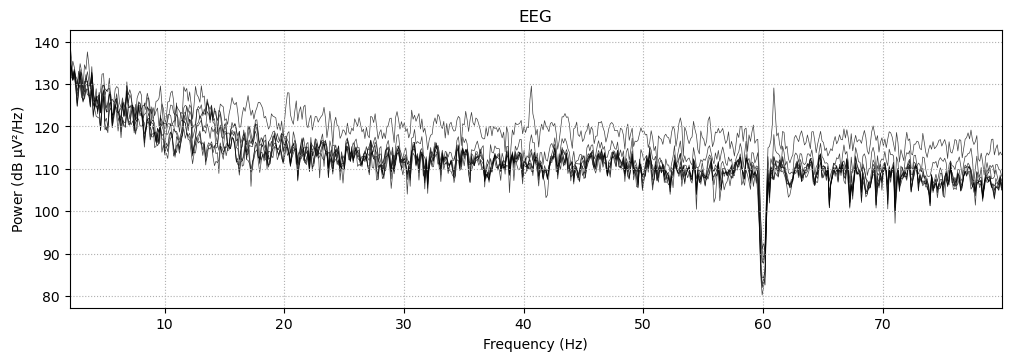

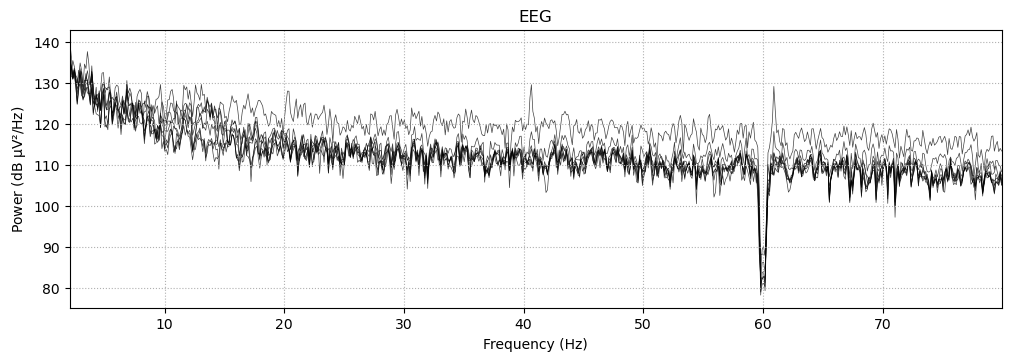

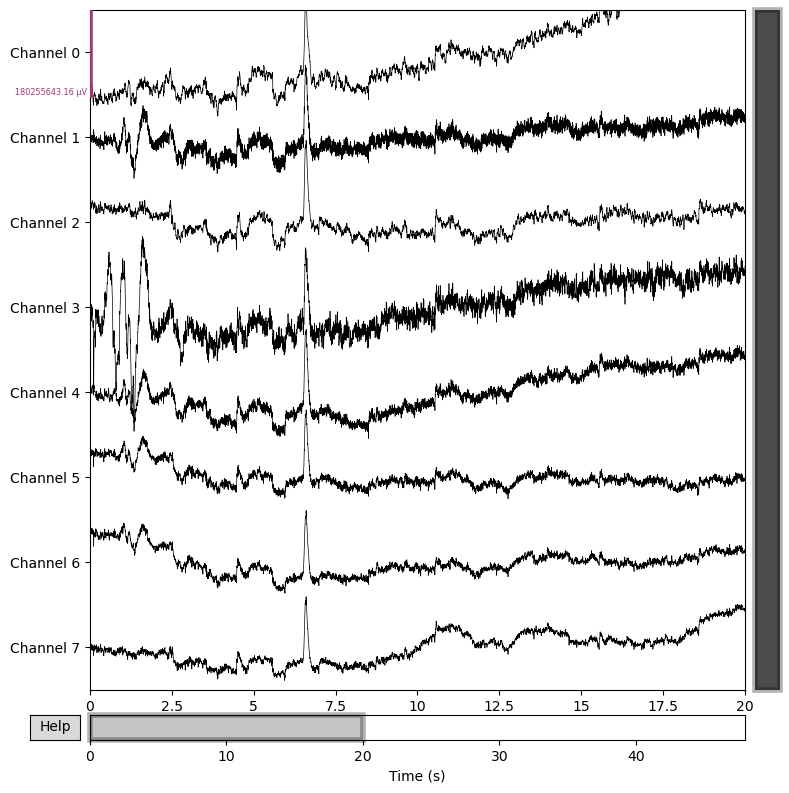

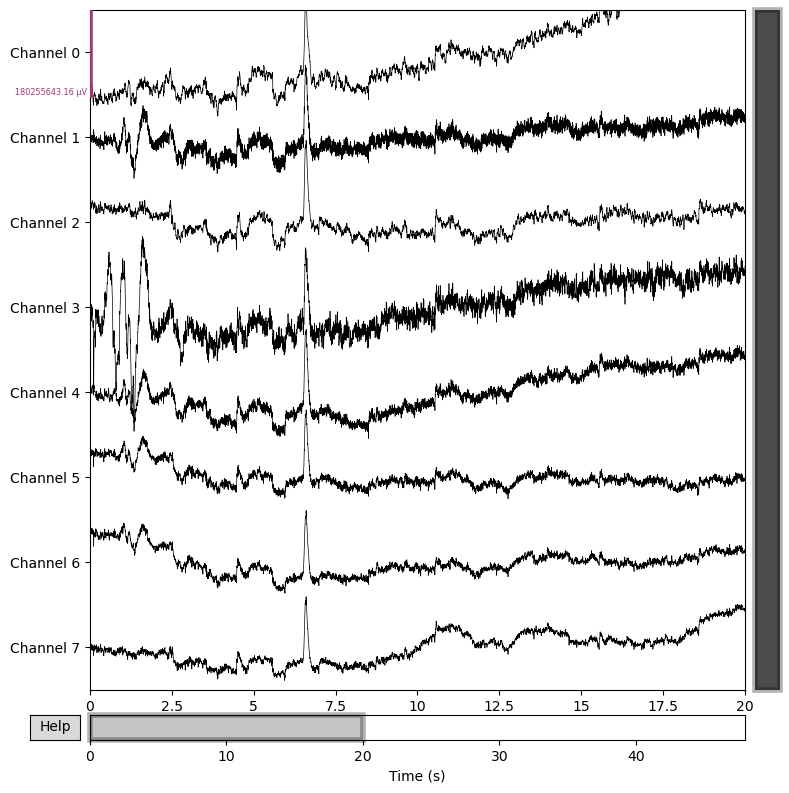

In [22]:
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())

# Plot the specified interval
raw.plot(duration=20, scalings='auto')